## Regression as Neural Networks Practical


> *** GOOD JOB IN GENERAL. THE CODE WAS NICE PRESENTED AND THE MODEL COULD APPROXIMATE THE TARGET. FOR FURTHER IMPROVEMENT, MORE COMMENTS WOULD BE APPRECIATED AS WELL AS MORE DETAILS IN YOUR ANSWERS***

In [ ]:
import pandas
import numpy as np
np.random.seed(25) # for reproducibility
import pandas
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
dataframe = pandas.read_csv("https://raw.githubusercontent.com/eijaz1/Deep-Learning-in-Keras-Tutorial/master/data/hourly_wages_data.csv")
dataset = dataframe.values

In [ ]:
dataframe.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [ ]:
X = dataframe.drop(columns=['wage_per_hour']).values
Y = dataframe['wage_per_hour'].values

> *** GOOD ***

## Check the shapes of the data

In [ ]:
X.shape

(534, 9)

In [ ]:
Y.shape

(534,)

## Split the data into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [ ]:
# define the model
def baseline():
    # create model
    model = Sequential()
    
    # add one fully connected layer
    model.add(Dense(units = 8, input_dim=9, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(units=1, activation='relu'))    
    # Compile model
    model.compile(loss='mse', optimizer='adam',metrics=[metrics.mse])
    
    return model

> *** GOOD ***

## Task: draw the network on paper

In [ ]:
model = baseline()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


> *** GOOD ***

## Train the model

In [ ]:
history = model.fit(X_train, Y_train, epochs=24, batch_size=4, verbose=1)

Epoch 1/24
94/94 [==============================] - 1s 2ms/step - loss: 42.8464 - mean_squared_error: 42.8464
Epoch 2/24
94/94 [==============================] - 0s 2ms/step - loss: 33.7987 - mean_squared_error: 33.7987
Epoch 3/24
94/94 [==============================] - 0s 1ms/step - loss: 29.1673 - mean_squared_error: 29.1673
Epoch 4/24
94/94 [==============================] - 0s 2ms/step - loss: 26.6337 - mean_squared_error: 26.6337
Epoch 5/24
94/94 [==============================] - 0s 2ms/step - loss: 24.6900 - mean_squared_error: 24.6900
Epoch 6/24
94/94 [==============================] - 0s 2ms/step - loss: 24.1482 - mean_squared_error: 24.1482
Epoch 7/24
94/94 [==============================] - 0s 2ms/step - loss: 23.2338 - mean_squared_error: 23.2338
Epoch 8/24
94/94 [==============================] - 0s 2ms/step - loss: 23.1161 - mean_squared_error: 23.1161
Epoch 9/24
94/94 [==============================] - 0s 1ms/step - loss: 22.6996 - mean_squared_error: 22.6996
Epoch 10/2

> *** GOOD ***

## Predict on the test data

In [ ]:
prediction = model.predict(X_test)

## Compute the mean squared error

In [ ]:
mean_squared_error(Y_test, prediction)

16.88376570623

## Plot the error over the epochs

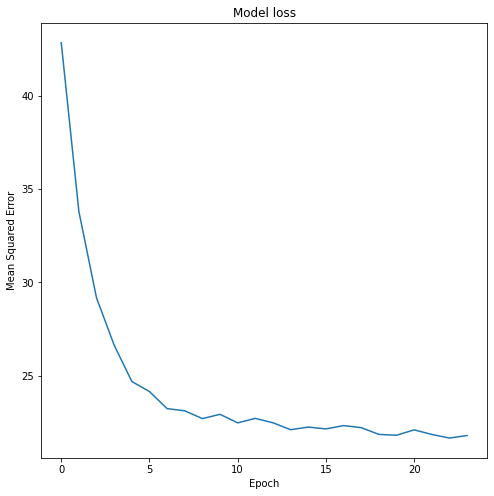

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

As the epoch increase the mean square error decrease so the more the epochs the better the predictions become

> *** GOOD. CAN YOU GIVE MORE DETAILS IN THE INTERPRETATION OF THIS RESULT? ***

#Answers to Questions

1) They are 9 inputs

2) They is 1 output

3)  We are trying to predict the hourly wage of people based on different feautures

> *** SAME REMARK AS ABOVE ***

Total marks: 21

Columns 2 to 10 represent the features of the dataset. The first column is the target. Answer the following questions

The dataset represents characteristics of people along with the associated salary earned per hour (in some scaled currency).

1) How many inputs would a neural network have if we tried to solve this problem?

2) How many outputs would the neural network have?

3) What is the goal here? What are we trying to achieve with machine learning?

<hr>

Implement a neural network in Tensorflow.

The total number of weights within the model should be less than 100. Make sure to print the number of parameters within your model.

Train for 24 epochs and use a batch size of 4. 

Predict on testing data (split the data into training and testing).

Determine the mean squared error on the test data

Plot the training loss and comment on the plot.